In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Σφαιρικές Συν/νες

$\phi$ σφαιρικό πλάτος, $\lambda$ σφαιρικό μήκος και $r$ ακτίνα. Οι σχέσεις που συνδέουν τις σφαιρικες με τις καρτεσιανές συν/νες είναι:
$$ \begin{align}
x &= r \cos \phi \cos \lambda \\
y &= r \cos \phi \sin \lambda \\
z &= r \sin \phi
\end{align}
$$

και αντίστροφα:
$$ \begin{align}
\lambda &= \arctan \frac{y}{x} \\
\phi &= \arctan \frac{z}{\sqrt{x^2 + y^2}} \\
r &= \sqrt{x^2 + y^2 + z^2}
\end{align}
$$

In [2]:
def spherical2cartesian(r, lat, lon):
    """ Σφαιρικές σε καρτεσιανές συν/νες. 
        
        Παράμετροι:
        -----------
        r:   Ακτίνα κύκλου σε [m].
        lat: Σφαιρικό πλάτος [rad].
        lon: Σφαιρικό μήκος [rad].

        Εξαγώμενα:
        ----------
        Καρτεσιανές συν/νες (x, y, z) σε [m] ως λίστα.
    """
    x = r * np.cos(lat) * np.cos(lon)
    y = r * np.cos(lat) * np.sin(lon)
    z = r * np.sin(lat)
    return x, y, z

def cartesian2spherical(x, y, z):
    """ Καρτεσιανές σε σφαιρικές συν/νες. 
        
        Παράμετροι:
        ----------
        Καρτεσιανές συν/νες (x, y, z) σε [m].
        
        Εξαγώμενα:
        -----------
        r:   Ακτίνα κύκλου σε [m].
        lat: Σφαιρικό πλάτος [rad], στο διάστημα [-π/2, π/2]
        lon: Σφαιρικό μήκος [rad], στο διάστημα [-π, π]
        Επιστρέφονται σε λίστα, ως (r, φ, λ)
    """
    lon = np.arctan2(y, x)
    lat = np.arctan2(z, np.sqrt(x*x + y*y))
    r   = np.sqrt(x*x + y*y + z*z)
    if not (abs(lat) <= np.pi / 2.):
        raise RuntimeError("Failed converting cartesian to spherical!")
    return r, lat, lon


## Επαλήθευση

Ξεκινώντας με τυχαία $\phi _0$ και $\lambda _0$, τέτοια ώστε $-90^{\circ} \le \phi \lt 90^{\circ}$ και $-180^{\circ} \le \lambda \lt 180^{\circ}$ και θεωρώντας ως $r$ την (ισημερινή) ακτίνα της Γης, υπολογίζουμε την ακολυθία μεασχηματισμών:
$$ (r _0, \phi _0, \lambda _0) \Rightarrow (x, y, z) \Rightarrow (r _1, \phi _1, \lambda _1) $$
Προφανώς, θα πρέπει:
$$ (r _0, \phi _0, \lambda _0) \approx (r _1, \phi _1, \lambda _1) $$

Αν τα $\phi _0$ και $\phi _1$ απέχουν π.χ. $5'$ της μοίρας, δηλαδή: $\delta \phi = 5'$ και $\delta \lambda = 0$, πόση είναι η απόσταση που τα χωρίζει στην επιφάνεια της (σφαιρικής) Γής; Ξέρουμε ότι $s = \omega \dot R$, οπότε αν $R=6378137$ και $\omega = 1'$, $s=$

In [3]:
# δφ σε (μοίρες, λεπτά δεύτερα)
delta_lats = [(1,0,0.), (0,1,0.), (0,0,1.), (0,0,.1), (0,0,.01), (0,0,.001)]
for df in delta_lats:
    # δφ σε rad
    df_rad = np.radians(df[0] + df[1]/60. + df[2]/(60.*60.))
    s = df_rad * 6378137.
    print("δφ = {:d}° {:2d}' {:5.3f}\" -> δs = {:12.3f} [m]".format(df[0], df[1], df[2], s))

δφ = 1°  0' 0.000" -> δs =   111319.491 [m]
δφ = 0°  1' 0.000" -> δs =     1855.325 [m]
δφ = 0°  0' 1.000" -> δs =       30.922 [m]
δφ = 0°  0' 0.100" -> δs =        3.092 [m]
δφ = 0°  0' 0.010" -> δs =        0.309 [m]
δφ = 0°  0' 0.001" -> δs =        0.031 [m]


In [4]:
num_tests = 100
# ακτίνα Γης στον ισημερινό
r = 6378137e0
# κριτήριο σύγκλισης, 1 [arcsec] σε [rad]
TOLERANCE = np.radians(1e0 / 3600.)
for test_nr in range(num_tests):
    # τυχαίο πλάτος
    lat = np.random.uniform(-90e0, 90e0)
    # τυχαίο μήκος
    lon = np.random.uniform(-180e0, 180e0)
    # σφαιρικές σε καρτεσιανές ...
    x, y, z = spherical2cartesian(r, np.radians(lat), np.radians(lon))
    # καρτεσιανές σε σφαιρικές ...
    r2, lat2, lon2 = cartesian2spherical(x, y, z)
    # επαλήθευση
    assert( abs(lat2-np.radians(lat))<TOLERANCE )
    assert( abs(lon2-np.radians(lon))<TOLERANCE )
    assert( abs(r2-r)<1e-3 )
    

## Ελλειψοειδές Αναφοράς

Συνήθως δίνονται δύο βασικά γεωμετρικά μεγέθη του ελλειψοειδούς (δλδ. μεγάλος ημιάξονας $a$ και επιπλάτυνση ($f$ ή $1/f$), από όπου μπορούν να υπολογιστούν οι λοιπές γεωμετρικές ποσότητες ενδιαφέροντος, όπως ο μικρός ημιάξονας $b$ και η εκκεντρότητα $e$.

### Γεωμετρικές Παράμετροι του Ελλειψοειδούς

In [5]:
## Γεωμετρικές σταθερές WGS84 
wgs84_a = 6378137e0
wgs84_f = 1/298.257223563

def semi_minor(semi_major, flattening):
    """ Υολογισμός μικρού ημιάξονα β = α * (1-f)
        
        Παράμετροι:
        ----------
        semi_major: Μεγάλος ημιάξονας ελλειψοειδούς α, σε [m].
        flattening: Επιπλάτυνση [-]
        
        Εξαγώμενα:
        -----------
        Μικρός ημιάξονας ελλειψοειδούς β, σε [m].
    """
    return semi_major*(1e0-flattening)

# Compute ellipsoid eccentricity (e) given the flattening (f)
def eccentricity(flattening):
    """ Υολογισμός εκκεντρότητας, ε = (f * (2-f))^(1/2)
        
        Παράμετροι:
        ----------
        flattening: Επιπλάτυνση ελλειψοειδούς [-]
        
        Εξαγώμενα:
        -----------
        Εκκεντρότητα ελλειψοειδούς, ε.
    """
    return math.sqrt(flattening * (2e0 - flattening))

## Geometric parameters of WGS84
## -----------------------------
print("WGS84 geometry:")
print("\tSemi-major  : {:10.3f} m".format(wgs84_a))
print("\tSemi-minor  : {:10.3f} m".format(semi_minor(wgs84_a, wgs84_f)))
print("\tEccentricity: {:10.6f}".format(eccentricity(wgs84_f)))
print("\tNote: Semi-major - semi-minor is {:.3f} km".format((wgs84_a-semi_minor(wgs84_a, wgs84_f))*1e-3))

WGS84 geometry:
	Semi-major  : 6378137.000 m
	Semi-minor  : 6356752.314 m
	Eccentricity:   0.081819
	Note: Semi-major - semi-minor is 21.385 km


### Ακτίνα καμπυλότητας της κύριας κάθετης τομής

$$ Ν = \frac{a}{\sqrt( 1-e^2 \sin^2 \phi )} $$

![Image Description](ell_N.png)

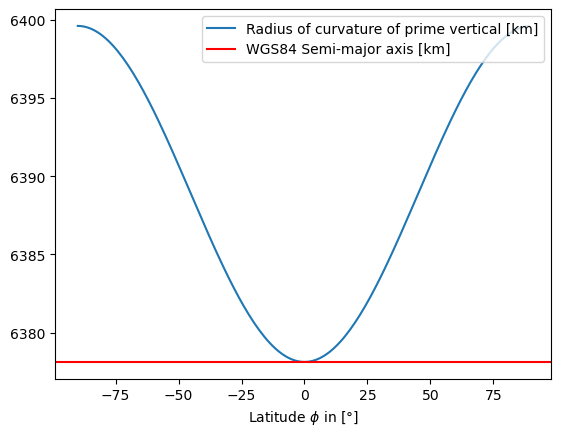

Radius of curvature of prime vertical (semi-major: 6378137.0)
	At latitude =  0 deg.          6378137.000m
	At latitude = 90 deg.          6399593.626m
	Maximum difference:                 21.457km


In [8]:
def N(semi_major, eccentricity, geodetic_latitude):
    """ Ακτίνα καμπυλότητας της κύριας κάθετης τομής Ν [m]
        Ν = α / (1-ε^2 * sin^2f)^(1/2)
        
        Παράμετροι:
        ----------
        semi_major: Μεγάλος ημιάξονας ελλειψοειδούς α, σε [m].
        eccentricity: Εκκεντρότητα [-].
        geodetic_latitude: Γεωδαιτικό πλάτος φ, σε [rad].
        
        Εξαγώμενα:
        -----------
        Ακτίνα καμπυλότητας της κύριας κάθετης τομής Ν σε [m].
    """
    sf = math.sin(geodetic_latitude);
    sf2 = sf * sf
    e2 = eccentricity * eccentricity
    return semi_major / math.sqrt(1e0 - e2 * sf2)
    
## Make a quick plot of the radius of curvature for latitudes in range -90 to 90 [deg].
## Reference Ellipsoid: WGS84
lats = range(-90, 90)
rads = [ N(wgs84_a, eccentricity(wgs84_f), math.radians(f))*1e-3 for f in lats ]
plt.plot(lats, rads, label="Radius of curvature of prime vertical [km]")
plt.axhline(y = wgs84_a*1e-3, color = 'r', linestyle = '-', label="WGS84 Semi-major axis [km]")
# plt.axhline(y = semi_minor(wgs84_a, wgs84_f)*1e-3, color = 'g', linestyle = '-', label="WGS84 Semi-minor axis [km]")
plt.legend(loc='upper right')
plt.xlabel(r"Latitude $\phi $ in [$\degree$]")
plt.show()

N_0 = N(wgs84_a, eccentricity(wgs84_f), 0e0)
N_90 = N(wgs84_a, eccentricity(wgs84_f), math.pi/2)
print("Radius of curvature of prime vertical (semi-major: 6378137.0)")
print("\tAt latitude =  0 deg. {:20.3f}m".format(N_0))
print("\tAt latitude = 90 deg. {:20.3f}m".format(N_90))
print("\tMaximum difference:   {:20.3f}km".format((N_90-N_0)*1e-3))

### Ακτίνες στο ελλειψοειδές

Ακτίνα καμπυλότητας της Μεσημβρινής Τομής 
$$\rho = \frac{a (1-e^2)}{\left( 1 - e^2  \sin^2 \phi \right)^{3/2}}$$

![Image Description](ell_RM.png)

Ακτίνα του Gauss
$$ R_g = \frac{a \sqrt{1-e^2}}{ 1 - e^2  \sin^2 \phi } = \sqrt{\rho N}$$

Ακτίνα παράλληλου κύκλου
$$ r = N \cos \phi $$

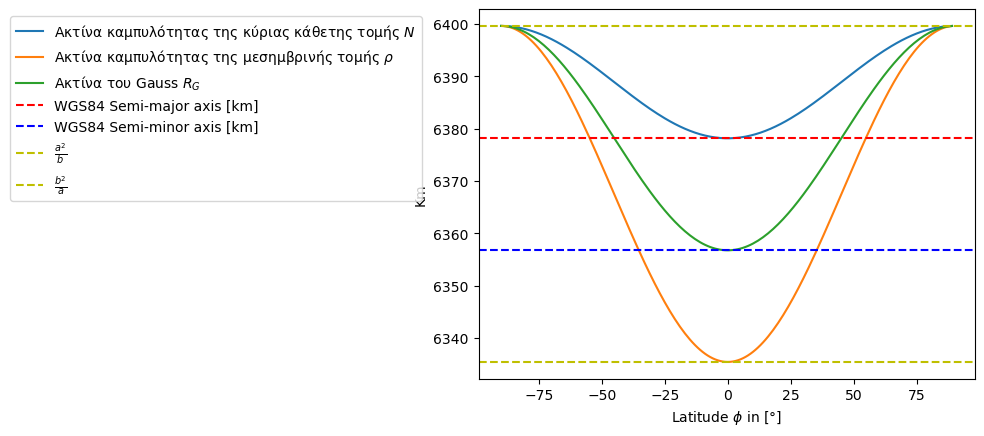

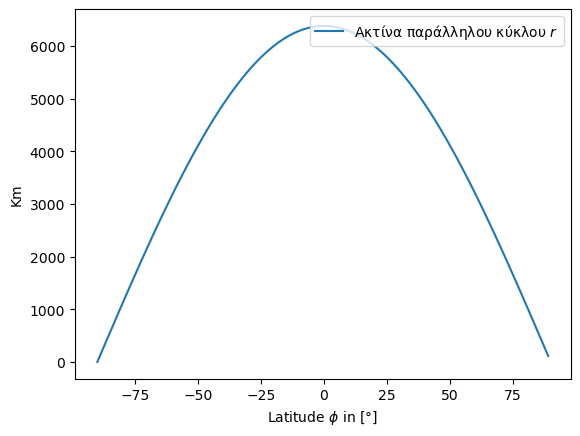

In [16]:
def rrho(semi_major, eccentricity, geodetic_latitude):
    """ Ακτίνα καμπυλότητας της μεσημβρινής τομής ρ [m]
        Ν = α(1-ε^2) / (1-ε^2 * sin^2f)^(1/2)
        
        Παράμετροι:
        ----------
        semi_major: Μεγάλος ημιάξονας ελλειψοειδούς α, σε [m].
        eccentricity: Εκκεντρότητα [-].
        geodetic_latitude: Γεωδαιτικό πλάτος φ, σε [rad].
        
        Εξαγώμενα:
        -----------
        Ακτίνα καμπυλότητας της μεσημβρινής τομής ρ, σε [m].
    """
    sf = math.sin(geodetic_latitude);
    sf2 = sf * sf
    e2 = eccentricity * eccentricity
    return (semi_major * (1e0-e2)) / math.pow(1e0 - e2 * sf2, 3e0/2)

def rgauss(semi_major, eccentricity, geodetic_latitude):
    """ Ακτίνα του Gauss, Rg [m]
        Rg = (ρΝ)^(1/2)
        
        Παράμετροι:
        ----------
        semi_major: Μεγάλος ημιάξονας ελλειψοειδούς α, σε [m].
        eccentricity: Εκκεντρότητα [-].
        geodetic_latitude: Γεωδαιτικό πλάτος φ, σε [rad].
        
        Εξαγώμενα:
        -----------
        Ακτίνα του Gauss, Rg σε [m].
    """
    return math.sqrt(rrho(semi_major, eccentricity, geodetic_latitude) * N(semi_major, eccentricity, geodetic_latitude))

def rparallel(semi_major, eccentricity, geodetic_latitude):
    """ Ακτίνα παράλληλου κύκλου, r [m]
        ρ = Ν cosφ
        
        Παράμετροι:
        ----------
        semi_major: Μεγάλος ημιάξονας ελλειψοειδούς α, σε [m].
        eccentricity: Εκκεντρότητα [-].
        geodetic_latitude: Γεωδαιτικό πλάτος φ, σε [rad].
        
        Εξαγώμενα:
        -----------
        Ακτίνα παράλληλου κύκλου σε r [m].
    """
    return N(semi_major, eccentricity, geodetic_latitude) * math.cos(geodetic_latitude)

## Make a quick plot of the various radii for latitudes in range -90 to 90 [deg].
## Reference Ellipsoid: WGS84
lats = range(-90, 90)
Ns = [ N(wgs84_a, eccentricity(wgs84_f), math.radians(f))*1e-3 for f in lats ]
rs = [ rrho(wgs84_a, eccentricity(wgs84_f), math.radians(f))*1e-3 for f in lats ]
rg = [ rgauss(wgs84_a, eccentricity(wgs84_f), math.radians(f))*1e-3 for f in lats ]
rp = [ rparallel(wgs84_a, eccentricity(wgs84_f), math.radians(f))*1e-3 for f in lats ]
plt.plot(lats, Ns, label=r"Ακτίνα καμπυλότητας της κύριας κάθετης τομής $N$")
plt.plot(lats, rs, label=r"Ακτίνα καμπυλότητας της μεσημβρινής τομής $\rho$")
plt.plot(lats, rg, label=r"Ακτίνα του Gauss $R_G$")
# plt.plot(lats, rp, label="Radius of parallel [km]")
plt.axhline(y = wgs84_a*1e-3, color = 'r', linestyle = '--', label="WGS84 Semi-major axis [km]")
plt.axhline(y = semi_minor(wgs84_a, wgs84_f)*1e-3, color = 'b', linestyle = '--', label="WGS84 Semi-minor axis [km]")
plt.axhline(y = (wgs84_a*wgs84_a / semi_minor(wgs84_a, wgs84_f))*1e-3, color = 'y', linestyle = '--', label=r"$\frac{a^2}{b}$")
plt.axhline(y = (semi_minor(wgs84_a, wgs84_f)*semi_minor(wgs84_a, wgs84_f)/wgs84_a)*1e-3, color = 'y', linestyle = '--', label=r"$\frac{b^2}{a}$")
plt.legend(loc='upper right', bbox_to_anchor=(-.1, 1))
plt.xlabel(r"Latitude $\phi $ in [$\degree$]")
plt.ylabel("Km")
plt.show()

plt.plot(lats, rp, label=r"Ακτίνα παράλληλου κύκλου $r$")
plt.legend(loc='upper right')
plt.xlabel(r"Latitude $\phi $ in [$\degree$]")
plt.ylabel("Km")
plt.show()